## Notes for Mercari Price Suggestion Challenge

Examples and helpers for the presentation: https://docs.google.com/presentation/d/1AtvVds00Sfd8UJmO_ySKcN67tAwreDj3UA9MGJxZ1SA/edit?usp=sharing


In [58]:
%matplotlib inline
import pylab as plt
import numpy as np
import pandas as pd

### Data

`train_id` or `test_id` - integer, enumerated (no apparent data leakage)
`name` 			        - string
`item_condition_id`	    - integer levels (1, 2, 3)
`category_name`	        - string (with levels, e.g. Women/Tops & Blouses/Blouse)
`brand_name`		    - string, if no brand name left empty
`price`				    - integer
`shipping` 			    - binary, 1 if the seller pays for it (free shipping), 0 otherwise
`item_description`      - string, where lack of description is marked as "No description yet"

In [61]:
mercari = pd.read_table('~/Downloads/train.tsv')
mercari.head(10)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma..."
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8.0,0,I realized his pants are on backwards after th...


### Evaluation

The evaluation method for the challenge was Root Mean Squared Logarithmic Error (RMSLE).

This section is an example comparison of Root Mean Squared Error and Root Mean Squared Logarithmic Error,
on sample data. Feel free to play around to get a better intuition!

In [ ]:
# Sampling data
def sample_data(scale, spread, n_samples, slope):
    x = np.random.random(n_samples) * scale
    y = slope * x + 1 + np.random.random(n_samples) * spread
    obs = y
    pred = slope * x + spread / 2 + 1
    return x, y, obs, pred

# Plotting the data sample
def plot_sample(x, y, obs, pred):
    plt.plot(x, pred, '-', color='#8f4898')
    for idx in range(len(obs)):
        plt.plot([x[idx], x[idx]], [pred[idx], obs[idx]], '#D7907B')
    plt.plot(x, y, 'o', color='#531CB3')

$\large RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( p_i - a_i \right)^2}$

$\large RMSLE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( \log(p_i+1) - \log(a_i+1) \right)^2}$

In [ ]:
def RMSE(pred, obs): 
    return np.sqrt(np.cumsum((pred - obs) ** 2) / (np.arange(len(pred)) + 1))
    
def RMSLE(pred, obs):
    return np.sqrt(np.cumsum((np.log(pred + 1) - np.log(obs + 1)) ** 2) / (np.arange(len(pred)) + 1))

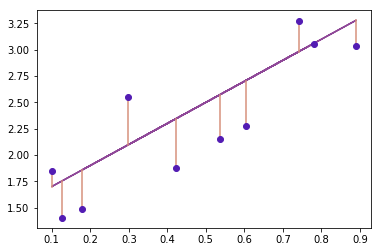

In [53]:
# Small sample of relatively small data
x, y, obs, pred = sample_data(1, 1, 10, 2)
plot_sample(x, y, obs, pred)

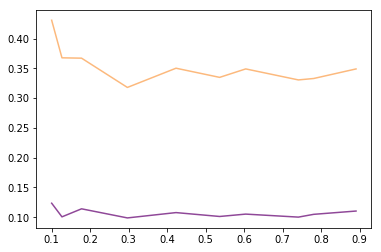

In [54]:
# If both predicted and actual values are small, RMSE and RMSLE are relatively close
plt.plot(sorted(x), RMSLE(pred, obs), color="#8f4898")
plt.plot(sorted(x), RMSE(pred, obs), color='#FCB97D')

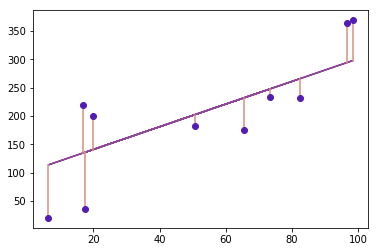

In [55]:
# Small sample of relatively big data
x, y, obs, pred = sample_data(100, 200, 10, 2)
plot_sample(x, y, obs, pred)

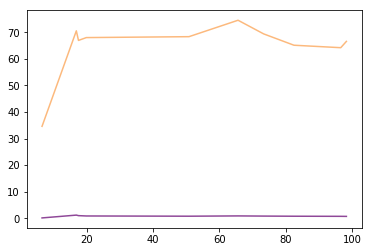

In [56]:
# If predicted and/or actual values are big, the RMSE becomes much bigger and RMSLE is negligible
plt.plot(sorted(x), RMSLE(pred, obs), color="#8f4898")
plt.plot(sorted(x), RMSE(pred, obs), color='#FCB97D')